# Example 1: The image and probe reconstruction from simulated frames

In [1]:
import sys
import time
from datetime import timedelta, datetime, tzinfo
import argparse
import numpy as np
import h5py
import sharp
import sharpnsls2
import matplotlib.pyplot as plt
# make graphics inline
%matplotlib inline

Set the input parameters and run the program

In [2]:
t1 = datetime.now();
args = ['local', '-o', '10', '-i', '100', 'e1.cxi']
status = sharpnsls2.run(args)
t2 = datetime.now()

print "processing time: ", (t2 - t1), "status: ", status

processing time:  0:01:20.733528 status:  0


Show results

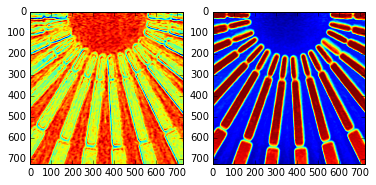

In [3]:
f = h5py.File('e1.cxi','r')
plt.subplot(1,2,1)
plt.imshow(np.abs(np.array(f['/entry_1/image_1/data'])))
plt.subplot(1,2,2)
plt.imshow(np.angle(np.array(f['/entry_1/image_1/data'])))